In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
file_path= "C:\\Users\DELL\\etf da concatenare\\dati_combined_finale.csv"

In [3]:
# Carico il DF 

df= pd.read_csv(file_path)

# EXPLORATORY ANALYSIS 

In [4]:
# Visualizzare le prime righe del DataFrame

print(df.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2018-12-01  110.209999  110.599998   91.730003   99.010002   94.173820   
1  2019-01-01   97.320000  109.150002   96.790001  108.779999  103.872147   
2  2019-02-01  107.849998  111.910004  106.360001  110.209999  105.237625   
3  2019-03-01  111.110001  114.059998  107.660004  113.849998  108.713387   
4  2019-04-01  114.769997  120.900002  114.410004  120.070000  115.044006   

      Volume            sector ETF Name  \
0  184699100  Consumer Service      XLY   
1  114456600  Consumer Service      XLY   
2   82301900  Consumer Service      XLY   
3  126494800  Consumer Service      XLY   
4   72082500  Consumer Service      XLY   

                                    Full ETF Name  
0  Consumer Discretionary Select Sector SPDR Fund  
1  Consumer Discretionary Select Sector SPDR Fund  
2  Consumer Discretionary Select Sector SPDR Fund  
3  Consumer Discretionary Select Sector SPDR Fund  
4  Consumer Discre

In [5]:
missing_data = df[df['Adj Close'].isnull()]
print(missing_data)

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume, sector, ETF Name, Full ETF Name]
Index: []


In [6]:
print(df['Date'].head())

0    2018-12-01
1    2019-01-01
2    2019-02-01
3    2019-03-01
4    2019-04-01
Name: Date, dtype: object


In [7]:
# Info riguardo il DF - tipi di dati, eventuali valori null e utilizzo di memoria 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1495 entries, 0 to 1494
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1495 non-null   object 
 1   Open           1495 non-null   float64
 2   High           1495 non-null   float64
 3   Low            1495 non-null   float64
 4   Close          1495 non-null   float64
 5   Adj Close      1495 non-null   float64
 6   Volume         1495 non-null   int64  
 7   sector         1495 non-null   object 
 8   ETF Name       1495 non-null   object 
 9   Full ETF Name  1495 non-null   object 
dtypes: float64(5), int64(1), object(4)
memory usage: 116.9+ KB
None


In [8]:
# Iniziamo con delle statistiche descrittive 

pd.set_option('display.float_format', '{:.2f}'.format) # Questa riga di codice mi serve per visualizzare due decimali 

print(df.describe())

         Open    High     Low   Close  Adj Close        Volume
count 1495.00 1495.00 1495.00 1495.00    1495.00       1495.00
mean   125.76  132.60  118.71  126.21     122.98  151901153.60
std     97.20  101.71   92.15   97.61      96.89  326597960.70
min     14.85   16.89   12.13   15.31      13.26      42400.00
25%     47.42   50.68   43.87   47.43      44.94    2608500.00
50%     84.28   88.78   80.61   84.48      82.73   11660100.00
75%    187.17  196.90  177.03  188.28     182.35  138789500.00
max    458.73  467.06  432.00  460.37     460.37 3049399400.00


In [9]:
# Verifica di eventuali valori mancanti 

print(df.isnull().sum())

Date             0
Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
sector           0
ETF Name         0
Full ETF Name    0
dtype: int64


In [10]:
# Analisi delle relazioni tra variabili (correlazioni)

correlation_matrix = df.corr()
print(correlation_matrix)

           Open  High   Low  Close  Adj Close  Volume
Open       1.00  1.00  1.00   0.99       0.99    0.00
High       1.00  1.00  0.99   1.00       1.00    0.00
Low        1.00  0.99  1.00   1.00       1.00   -0.00
Close      0.99  1.00  1.00   1.00       1.00   -0.00
Adj Close  0.99  1.00  1.00   1.00       1.00   -0.00
Volume     0.00  0.00 -0.00  -0.00      -0.00    1.00


C:\Users\DELL\AppData\Local\Temp\ipykernel_13384\2118572132.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


# GRAFICI CON MATPLOTLIB

GRAFICO A DISPERSIONE 

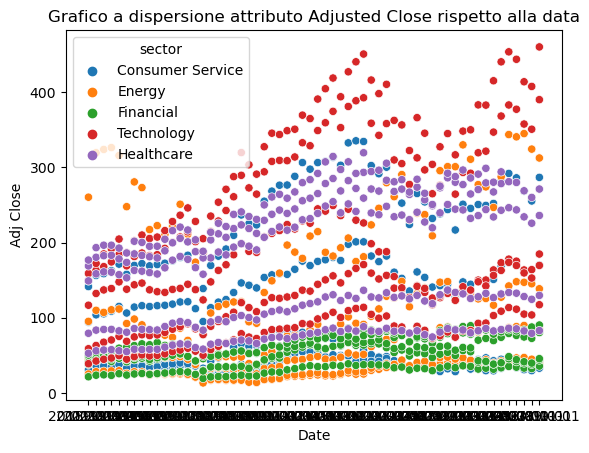

In [11]:
# Esempio di grafico a dispersione


sns.scatterplot(data=df, x='Date', y='Adj Close', hue='sector')
plt.title('Grafico a dispersione attributo Adjusted Close rispetto alla data')
plt.show()

ISTOGRAMMA

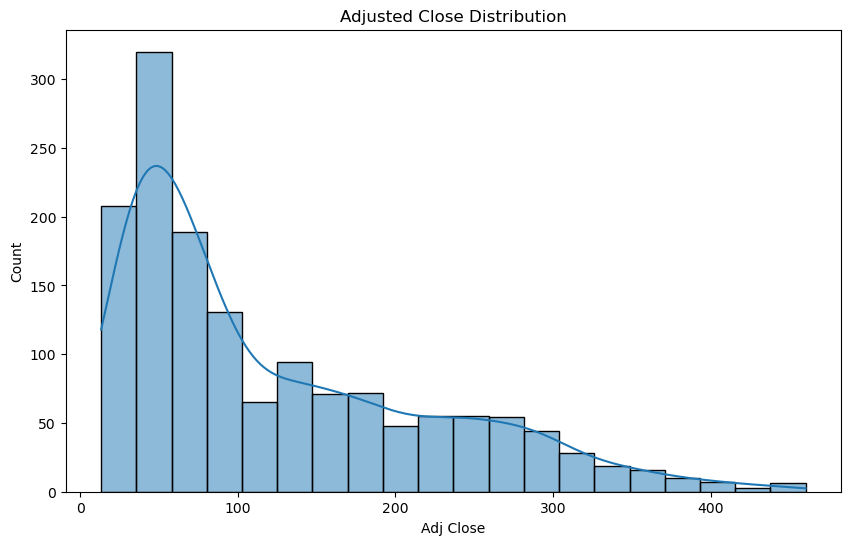

In [12]:


plt.figure(figsize=(10, 6))
sns.histplot(df['Adj Close'], bins=20, kde=True)
plt.title('Adjusted Close Distribution')
plt.show()


BOXPLOT 


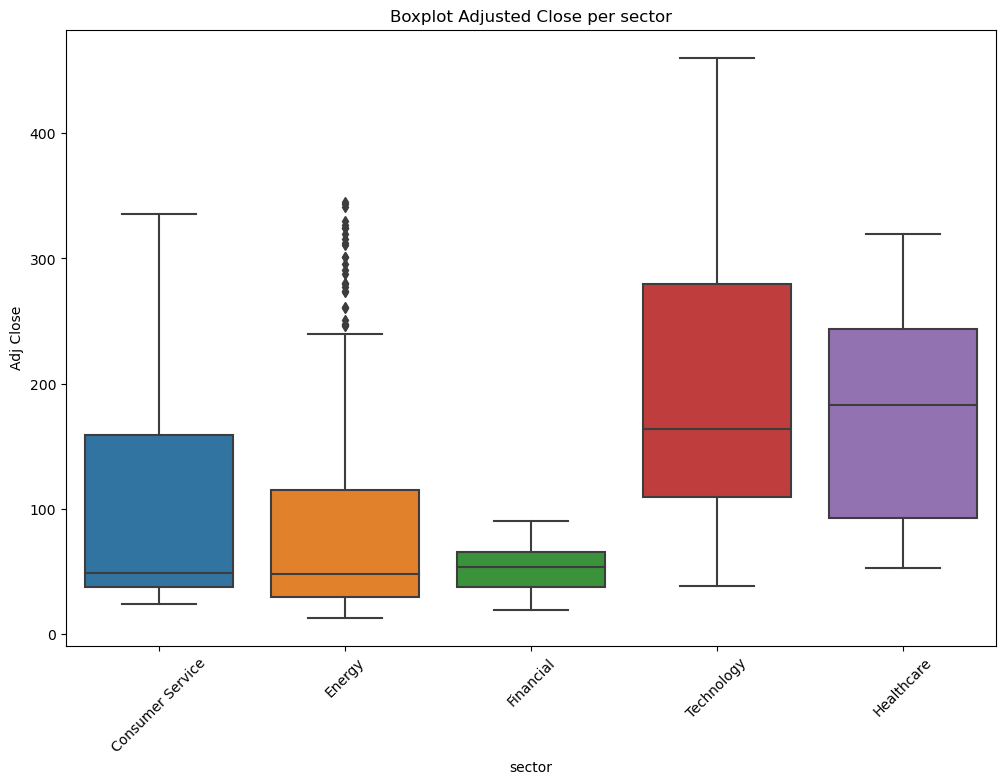

In [13]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='sector', y='Adj Close', data=df)
plt.title('Boxplot Adjusted Close per sector')
plt.xticks(rotation=45)
plt.show()

HEAT MAP 

C:\Users\DELL\AppData\Local\Temp\ipykernel_13384\1157686016.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)


Text(0.5, 1.0, 'Matrice di correlazione')

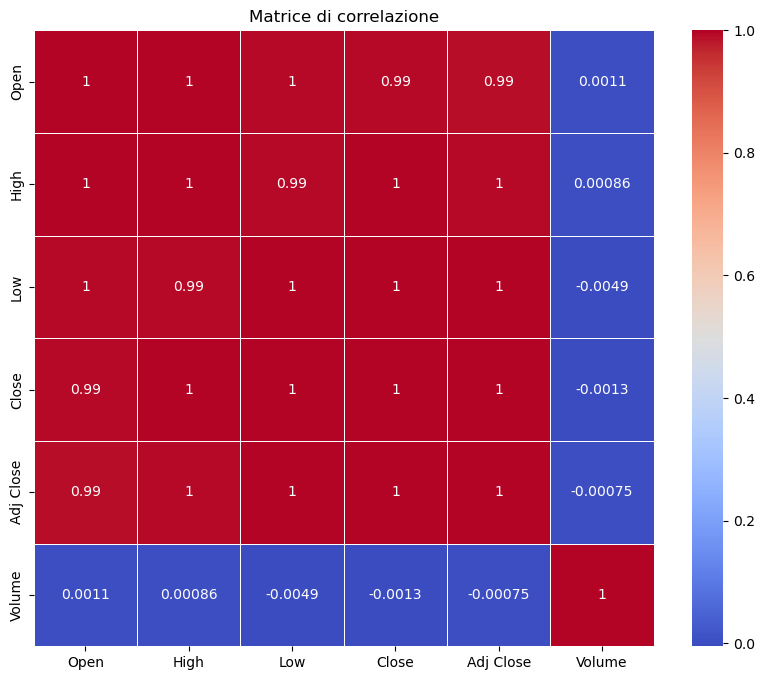

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matrice di correlazione')

# INDICATORI STATISTICI - KPI 

In [15]:
print(df['Date'].head())

0    2018-12-01
1    2019-01-01
2    2019-02-01
3    2019-03-01
4    2019-04-01
Name: Date, dtype: object


In [16]:
# Converti la colonna 'Date' in formato datetime
df['Date'] = pd.to_datetime(df['Date'])

In [17]:
print(df['Date'].head())


0   2018-12-01
1   2019-01-01
2   2019-02-01
3   2019-03-01
4   2019-04-01
Name: Date, dtype: datetime64[ns]


RENDIMENTO CUMULATIVO PERCENTUALE 


In [18]:
df['Cumulative Return'] = (1 + df['Adj Close'].pct_change()).cumprod() - 1

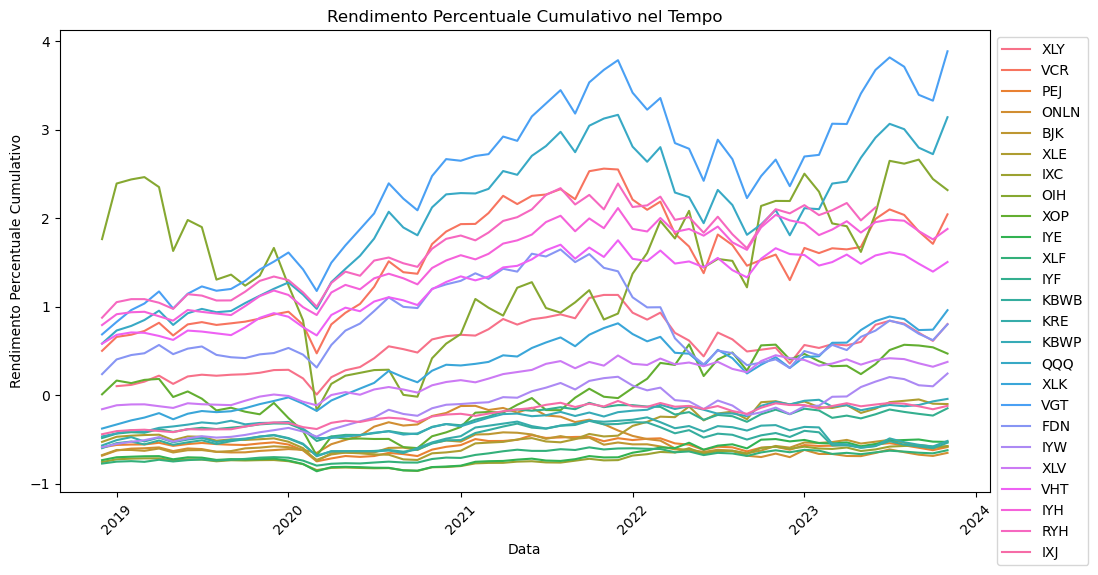

In [19]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Cumulative Return', hue='ETF Name')
plt.title('Rendimento Percentuale Cumulativo nel Tempo')
plt.xlabel('Data')
plt.ylabel('Rendimento Percentuale Cumulativo')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

VOLATILITà

In [20]:
df['Volatility'] = df['Adj Close'].pct_change().rolling(window=252).std() * np.sqrt(252)


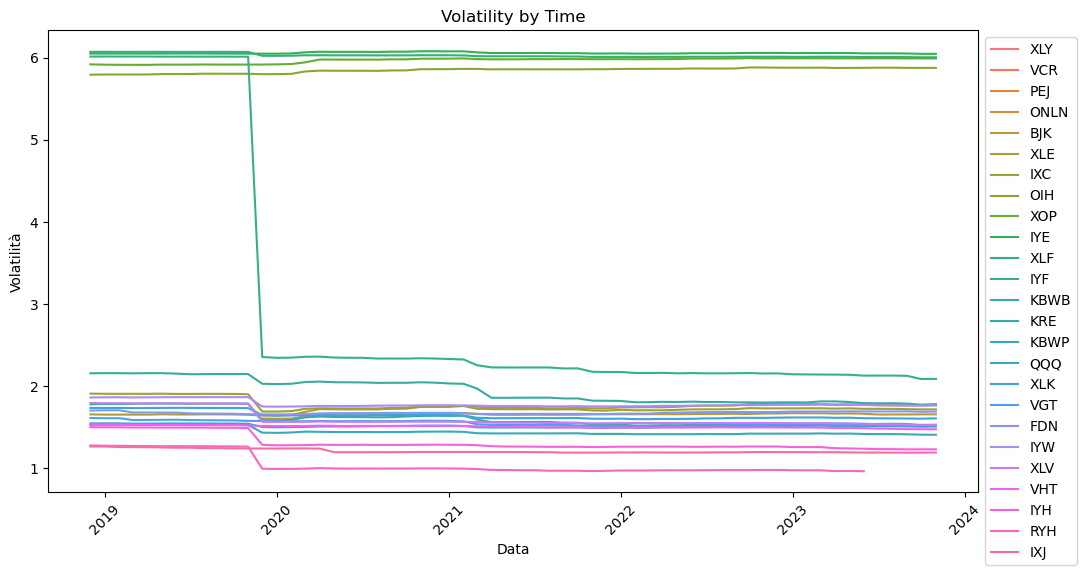

In [21]:
df['Date'] = pd.to_datetime(df['Date'])

# Crea il line plot della volatilità nel tempo per ciascun ETF

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Volatility', hue='ETF Name')
plt.title('Volatility by Time')
plt.xlabel('Data')
plt.ylabel('Volatilità')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

RENDIMENTO MEDIO GIORNALIERO

In [22]:
df['Daily Return'] = df['Adj Close'].pct_change()
mean_daily_return = df.groupby('ETF Name')['Daily Return'].mean()

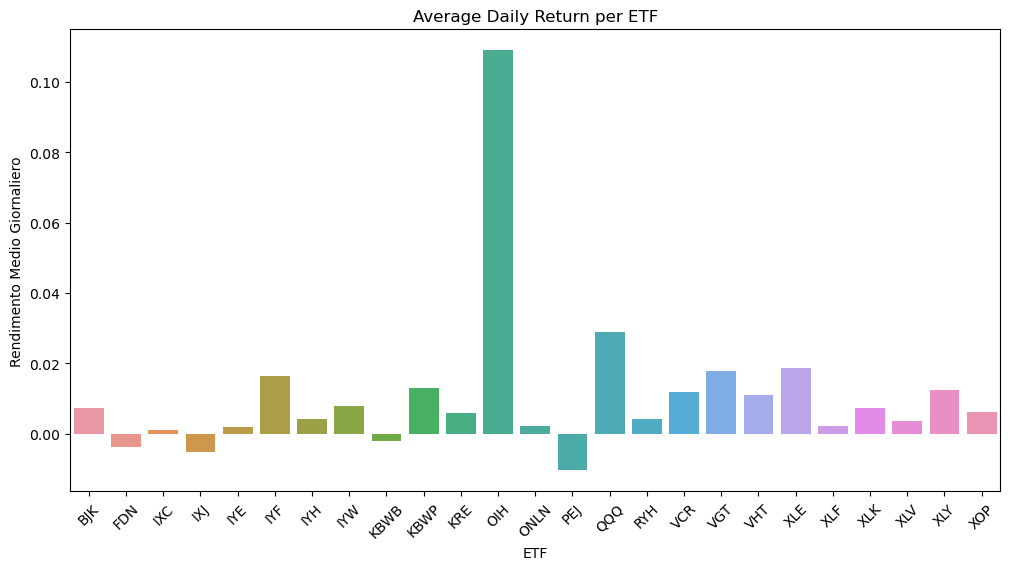

In [23]:
df['Date'] = pd.to_datetime(df['Date'])

# Calcola il rendimento medio giornaliero per ciascun ETF

mean_daily_return = df.groupby('ETF Name')['Daily Return'].mean().reset_index()

# Crea il bar plot o line plot del rendimento medio giornaliero

plt.figure(figsize=(12, 6))
sns.barplot(data=mean_daily_return, x='ETF Name', y='Daily Return')
plt.title('Average Daily Return per ETF')
plt.xlabel('ETF')
plt.ylabel('Rendimento Medio Giornaliero')
plt.xticks(rotation=45)
plt.show()


MAX DRAWDOWN

In [24]:
df['Roll_Max'] = df['Adj Close'].cummax()
df['Drawdown'] = df['Adj Close'] / df['Roll_Max'] - 1
max_drawdown = df.groupby('ETF Name')['Drawdown'].min()

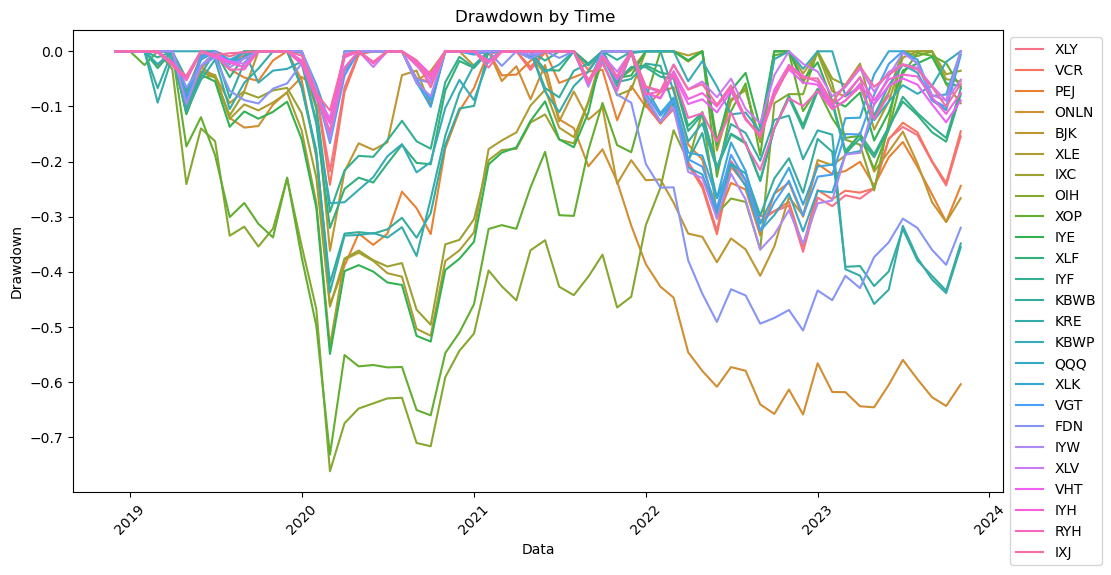

In [25]:
# Rappresentazione Grafica 

df['Date'] = pd.to_datetime(df['Date']) # mi assicura che la mia colonna Date sia in formato date usando la funzione pd.to_datetime

# Calcola il drawdown per ciascun ETF
df['Roll_Max'] = df.groupby('ETF Name')['Adj Close'].cummax()
df['Drawdown'] = df['Adj Close'] / df['Roll_Max'] - 1

# Line-Plot nel tempo 

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Drawdown', hue='ETF Name') # due linee creano il grafico 

# Personalizzazione del grafico 

plt.title('Drawdown by Time ')
plt.xlabel('Data')
plt.ylabel('Drawdown')
plt.xticks(rotation=45) # ruota le etichette di 45 gradi per rendere il tutto + leggibile 
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

RENDIMENTO ANNUO 

In [26]:
# Calcolo del rendimento annuo medio
df['Year'] = df['Date'].dt.year
annual_return = df.groupby(['ETF Name', 'Year'])['Adj Close'].pct_change().mean()

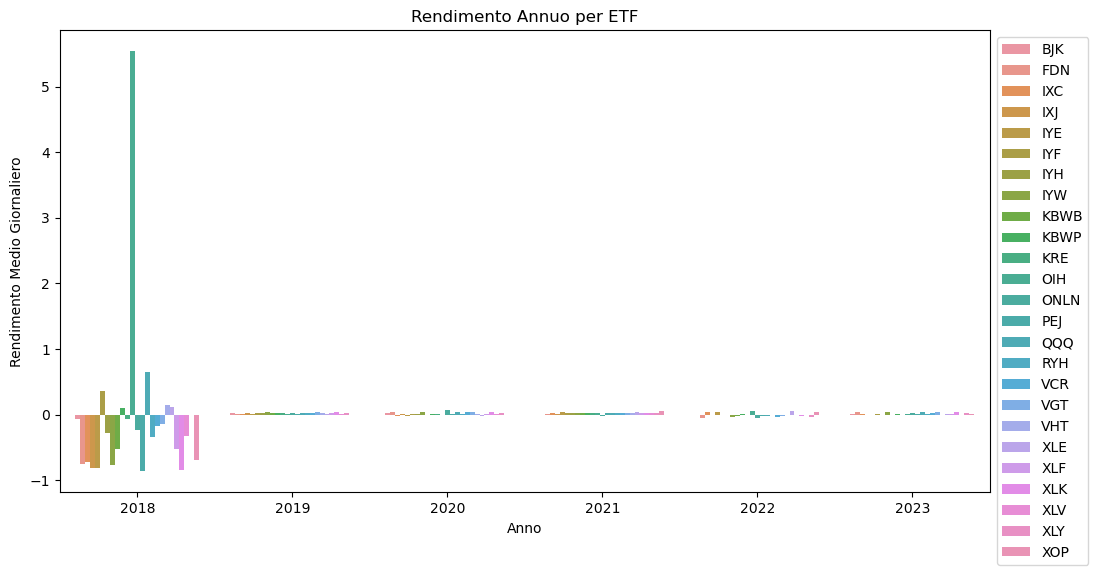

In [27]:
# Assicurati che la colonna 'Date' sia di tipo datetime
df['Date'] = pd.to_datetime(df['Date'])

# Estrai l'anno dalla colonna 'Date'
df['Year'] = df['Date'].dt.year

# Calcola il rendimento annuo per ciascun ETF
annual_returns = df.groupby(['ETF Name', 'Year'])['Daily Return'].mean().reset_index()

# Crea il bar plot del rendimento annuo
plt.figure(figsize=(12, 6))
sns.barplot(data=annual_returns, x='Year', y='Daily Return', hue='ETF Name')
plt.title('Rendimento Annuo per ETF')
plt.xlabel('Anno')
plt.ylabel('Rendimento Medio Giornaliero')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [28]:
df.to_csv(r'C:\Users\DELL\etf da concatenare\KPI_etf_concatenati.csv', index=False)

In [29]:
missing_data=df[df['Adj Close'].isnull()]